In [ ]:
#!pip install -r ../requirements.txt

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
import nltk
import spacy
import os
import string

In [3]:
df = pd.read_excel('../data/ep2-pln-train.xlsx')
df.head()

,resp_text,age
0,- Ano da fundação: 2014 - Quantidade de munic...,a4
1,- Ano da Fundação: ver http://dpgi.proplan.uf...,a4
2,"Prezado Sr Francisco, Em atenção ao seu ped...",a4
3,Prezado Sr Jose Taunai Em atenção ao seu pe...,a4
4,"Prezado Sr Sérgio Arantes, Em atenção ao se...",a4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   resp_text  7000 non-null   object
 1   age        7000 non-null   object
dtypes: object(2)
memory usage: 109.5+ KB


In [5]:
df.describe()

,resp_text,age
count,7000,7000
unique,6705,4
top,"Prezado (a) Sr. (a),",a2
freq,16,3000


In [8]:
df['resp_text'].describe()

count                       7000
unique                      6705
top        Prezado (a) Sr. (a), 
freq                          16
Name: resp_text, dtype: object

# Word Cloud

In [10]:
word_string = "".join(df['resp_text'].str.lower())

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\felma\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [17]:
stopwords = nltk.corpus.stopwords.words('portuguese')

(-0.5, 1599.5, 799.5, -0.5)

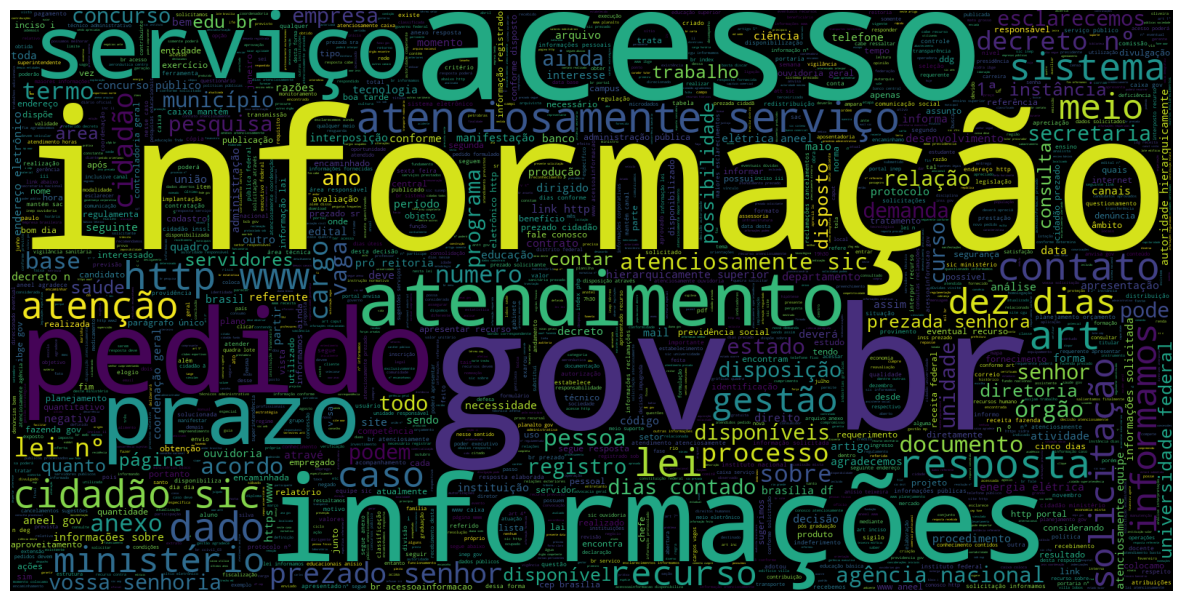

In [19]:
plt.figure(figsize=(15,15))

wc = wordcloud.WordCloud(stopwords=stopwords, max_words=2000, max_font_size=300, width=1600, height=800)
wc.generate(word_string)

plt.imshow(wc)
plt.axis('off')

In [22]:
texts = df['resp_text']
texts = texts.str.lower()
texts = texts.str.translate(str.maketrans('', '', string.punctuation))
#texts = texts.str.replace('[\d+]', '') #remove numeros

df['tokens'] = texts

In [23]:
df['tokens'] = [nltk.tokenize.word_tokenize(resp) for resp in df['tokens']]
df.head(10)

,resp_text,age,tokens
0,- Ano da fundação: 2014 - Quantidade de munic...,a4,"[ano, da, fundação, 2014, quantidade, de, muni..."
1,- Ano da Fundação: ver http://dpgi.proplan.uf...,a4,"[ano, da, fundação, ver, httpdpgiproplanufscbr..."
2,"Prezado Sr Francisco, Em atenção ao seu ped...",a4,"[prezado, sr, francisco, em, atenção, ao, seu,..."
3,Prezado Sr Jose Taunai Em atenção ao seu pe...,a4,"[prezado, sr, jose, taunai, em, atenção, ao, s..."
4,"Prezado Sr Sérgio Arantes, Em atenção ao se...",a4,"[prezado, sr, sérgio, arantes, em, atenção, ao..."
5,"""Em atenção à demanda abaixo, informo que tod...",a2,"[em, atenção, à, demanda, abaixo, informo, que..."
6,"""Informamos que a base completa contendo as i...",a1,"[informamos, que, a, base, completa, contendo,..."
7,"""Prezada Senhora, Em atendimento à v. s...",a1,"[prezada, senhora, em, atendimento, à, v, soli..."
8,"""Prezada solicitante, conforme orientação da ...",a2,"[prezada, solicitante, conforme, orientação, d..."
9,"""Prezada, Informamos que a Universidade Feder...",a4,"[prezada, informamos, que, a, universidade, fe..."


In [24]:
try:
    nlp = spacy.load("pt_core_news_sm")
except Exception:
    os.system("python -m spacy download pt_core_news_sm")
    nlp = spacy.load("pt_core_news_sm")

In [26]:
filtered = []
for sent in df['tokens']:
    sent = str(sent)
    doc = nlp(sent)
    temp = [token.lemma_ for token in doc if not token.is_punct]
    temp = " ".join(temp)
    filtered.append(temp)

In [28]:
df['lemma'] = filtered
df.head()

,resp_text,age,tokens,lemma
0,- Ano da fundação: 2014 - Quantidade de munic...,a4,"[ano, da, fundação, 2014, quantidade, de, muni...",ano de o fundação 2014 quantidade de município...
1,- Ano da Fundação: ver http://dpgi.proplan.uf...,a4,"[ano, da, fundação, ver, httpdpgiproplanufscbr...",ano de o fundação ver httpdpgiproplanufscbrleg...
2,"Prezado Sr Francisco, Em atenção ao seu ped...",a4,"[prezado, sr, francisco, em, atenção, ao, seu,...",prezar sr Francisco em atenção a o seu pedir d...
3,Prezado Sr Jose Taunai Em atenção ao seu pe...,a4,"[prezado, sr, jose, taunai, em, atenção, ao, s...",prezar sr jose taunai em atenção a o seu pedir...
4,"Prezado Sr Sérgio Arantes, Em atenção ao se...",a4,"[prezado, sr, sérgio, arantes, em, atenção, ao...",prezar sr sérgio arante em atenção a o seu ped...


In [29]:
word_string = "".join(df['lemma'].str.lower())

(-0.5, 1599.5, 799.5, -0.5)

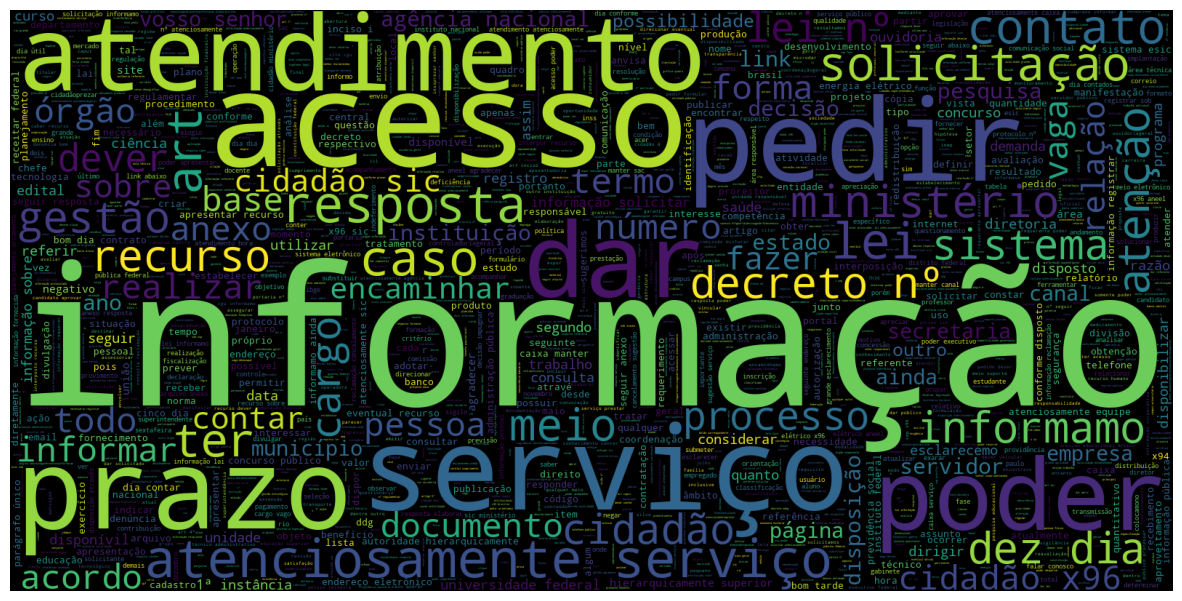

In [31]:
plt.figure(figsize=(15,15))

wc = wordcloud.WordCloud(stopwords=stopwords, max_words=2000, max_font_size=300, width=1600, height=800)
wc.generate(word_string)

plt.imshow(wc)
plt.axis('off')